### Objective: 
The primary objective of this project is to develop a predictive model that can identify 
customers at risk of churning, enabling the company to take proactive measures to retain 
them.

### Info about columns
- **customerID** :  Unique customer identifier.
- **gender** :  Customer's gender .
- **SeniorCitizen** :  Indicates senior citizen status .
- **Partner** : Indicates if customer has a partner .
- **Dependents** : Indicates if customer has dependents .
- **tenure** : Number of months with the company.
- **PhoneService** : Indicates phone service .
- **MultipleLines** : Indicates multiple lines .
- **InternetService** : Type of internet service .
- **OnlineSecurity** : Online security service .
- **OnlineBackup** : Online backup service .
- **DeviceProtection** : Device protection service .
- **TechSupport** : Tech support service .
- **StreamingTV** : Streaming TV service .
- **StreamingMovies** : Streaming movies service .
- **Contract** : Contract type .
- **PaperlessBilling** : Paperless billing .
- **PaymentMethod** : Payment method .
- **MonthlyCharges** : Monthly charges.
- **TotalCharges** : Total charges.
- **Churn** : Indicates if customer churned.

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1. Understanding the Data

In [2]:
# Reading data
df=pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Observation :- 
 We do not need information about customerID, so we can drop this column from the dataset.

### Data Preprocessing

In [5]:
df=df.drop(columns='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 20)

 - we have 7043 rows and 20 columns

In [7]:
# Checking missing values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Observation :-
 we do not have any missing vlaues in our dataset

In [8]:
#show datatype and count non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Observation :- 
As we can see from the datatypes of the features, there are some columns that need to modify their types .

In [9]:
df = df[df['TotalCharges'].str.strip() != '']

In [10]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [12]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Observation :- 
We have 11 missing values in the TotalCharges column out of 7043 rows, which is 1% of the data. Therefore, we can drop these values from the dataset.

In [13]:
df.dropna(inplace =True)

In [14]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# summary statistics od data 
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Checking unique value counts for all original object columns

In [16]:
cat=df.drop(['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'],axis=1)

In [17]:
for col in cat:
    print(col.upper(),":",df[col].nunique())
    print(df[col].value_counts().sort_values(ascending=False))
    print('\n')

GENDER : 2
gender
Male      3549
Female    3483
Name: count, dtype: int64


PARTNER : 2
Partner
No     3639
Yes    3393
Name: count, dtype: int64


DEPENDENTS : 2
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


PHONESERVICE : 2
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


MULTIPLELINES : 3
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


INTERNETSERVICE : 3
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


ONLINESECURITY : 3
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


ONLINEBACKUP : 3
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


DEVICEPROTECTION : 3
DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int

### Checking percentage of missing values

In [18]:
for i in df.columns:
    print('Precentage of missing values is {} % in {} '.format(round(
        (df[i].isnull().sum()/df.shape[0])*100,2),i))

Precentage of missing values is 0.0 % in gender 
Precentage of missing values is 0.0 % in SeniorCitizen 
Precentage of missing values is 0.0 % in Partner 
Precentage of missing values is 0.0 % in Dependents 
Precentage of missing values is 0.0 % in tenure 
Precentage of missing values is 0.0 % in PhoneService 
Precentage of missing values is 0.0 % in MultipleLines 
Precentage of missing values is 0.0 % in InternetService 
Precentage of missing values is 0.0 % in OnlineSecurity 
Precentage of missing values is 0.0 % in OnlineBackup 
Precentage of missing values is 0.0 % in DeviceProtection 
Precentage of missing values is 0.0 % in TechSupport 
Precentage of missing values is 0.0 % in StreamingTV 
Precentage of missing values is 0.0 % in StreamingMovies 
Precentage of missing values is 0.0 % in Contract 
Precentage of missing values is 0.0 % in PaperlessBilling 
Precentage of missing values is 0.0 % in PaymentMethod 
Precentage of missing values is 0.0 % in MonthlyCharges 
Precentage of 

### Observation :-
As we can see, our data does not have any missing values. Therefore, our data is clean and ready for visualization.

#### Checking descriptive Stats of the data
1. Chechking the descriptive stats(5 pt summary i.e, min,max,25%,50%,75%)
2. Comparing mean and median (to check if there are any outliers present in a column)
3. If there are any categorical columns check the number of unique values present and check its top and frequency

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


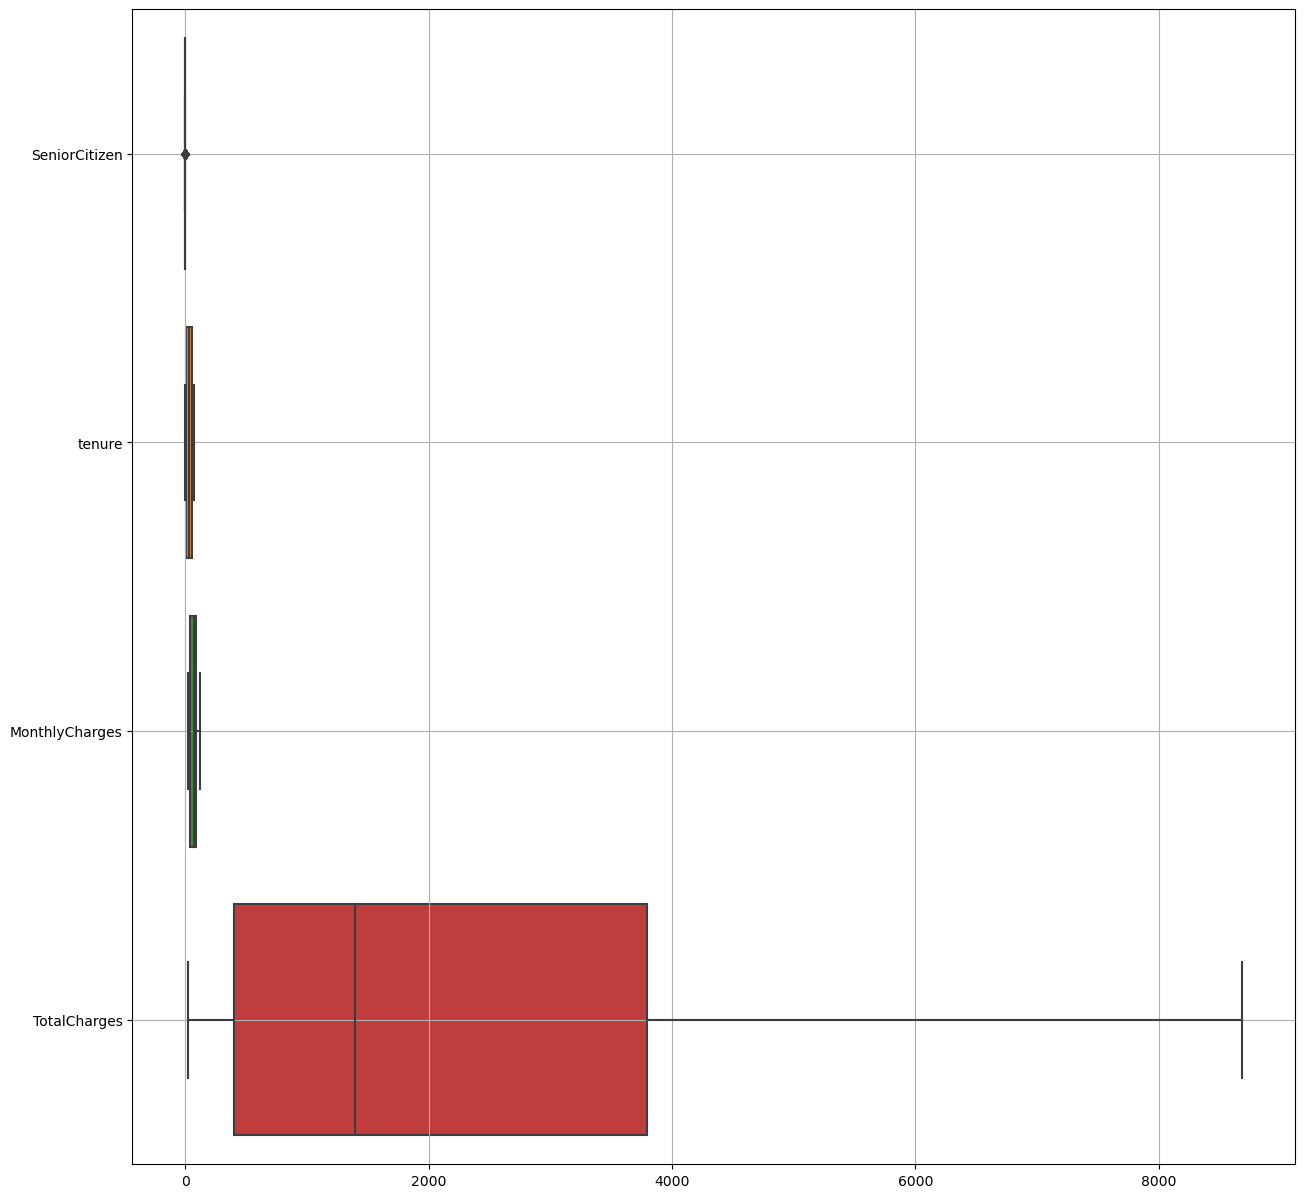

In [20]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,orient='h')
plt.grid()

### Observation :-
 There are no outliers present in the Numerical columns.

### Data Visualization

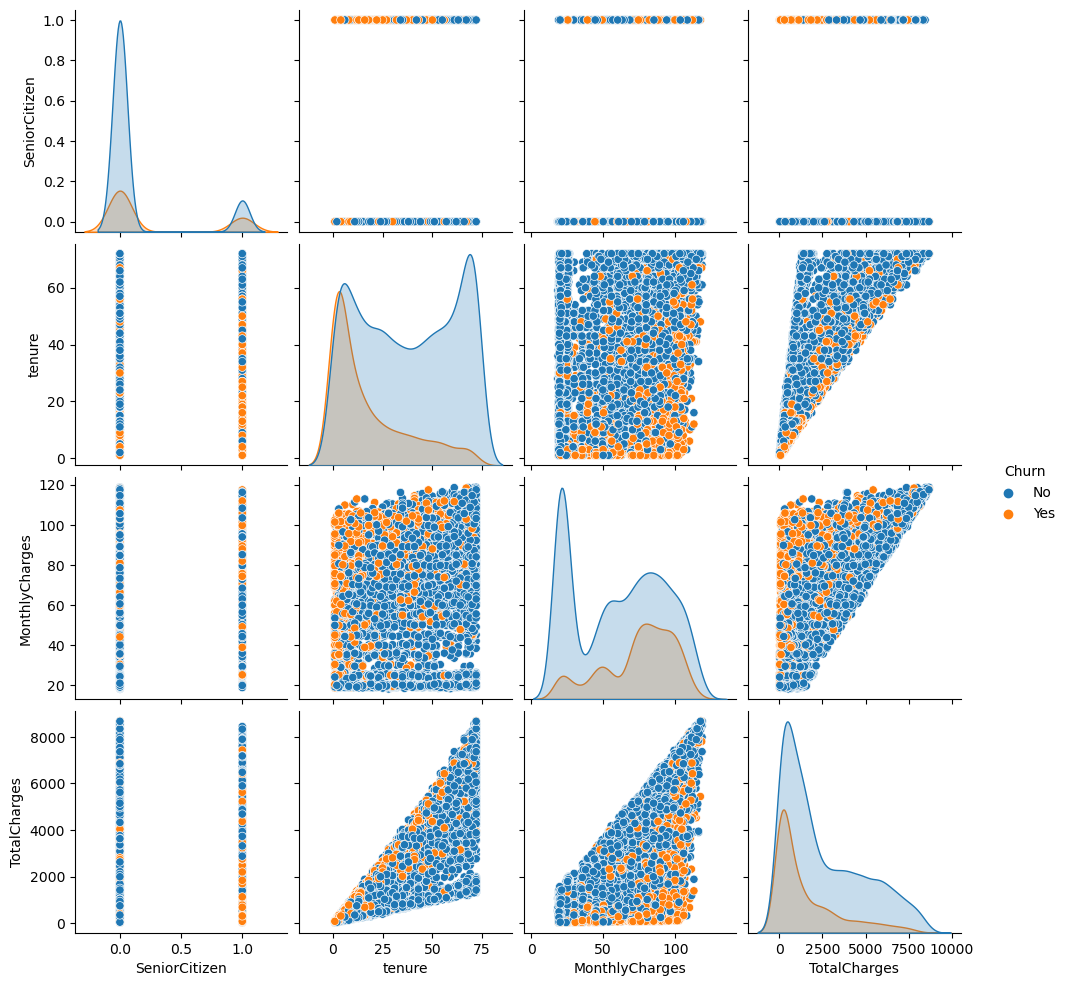

In [21]:
sns.pairplot(data=df,hue='Churn')

In [22]:
def uni_plot(columns):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.histplot(data=df,x=columns,kde=True,bins=20)
    plt.title('Histogram of {}'.format(columns))
    plt.subplot(2,2,2)
    sns.boxplot(data=df,x=columns)
    plt.title('Boxplot of {}'.format(columns))
    plt.show()

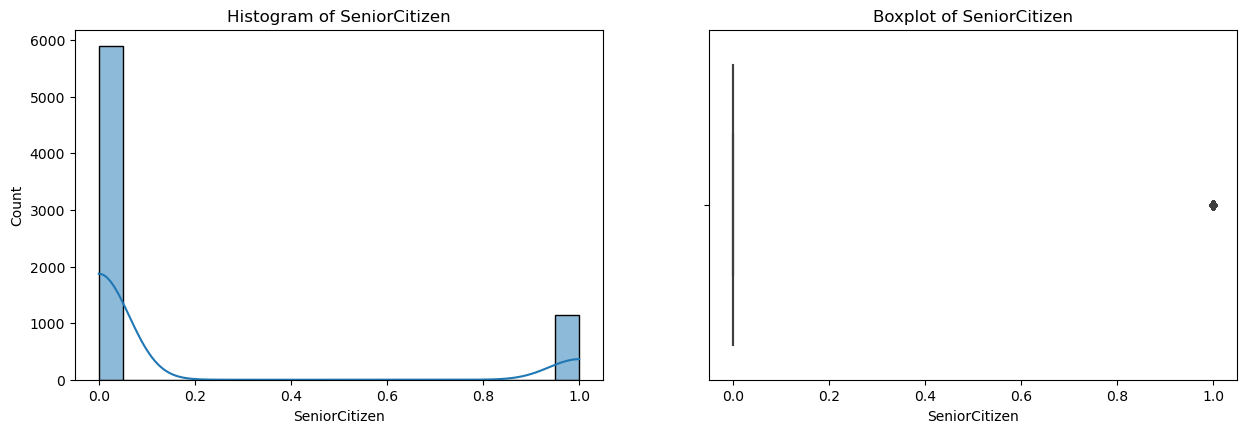

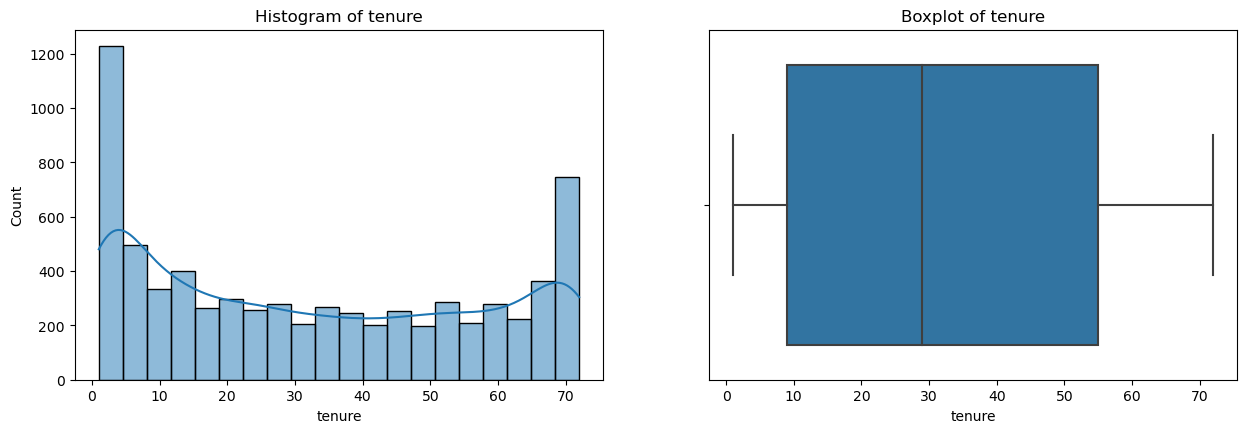

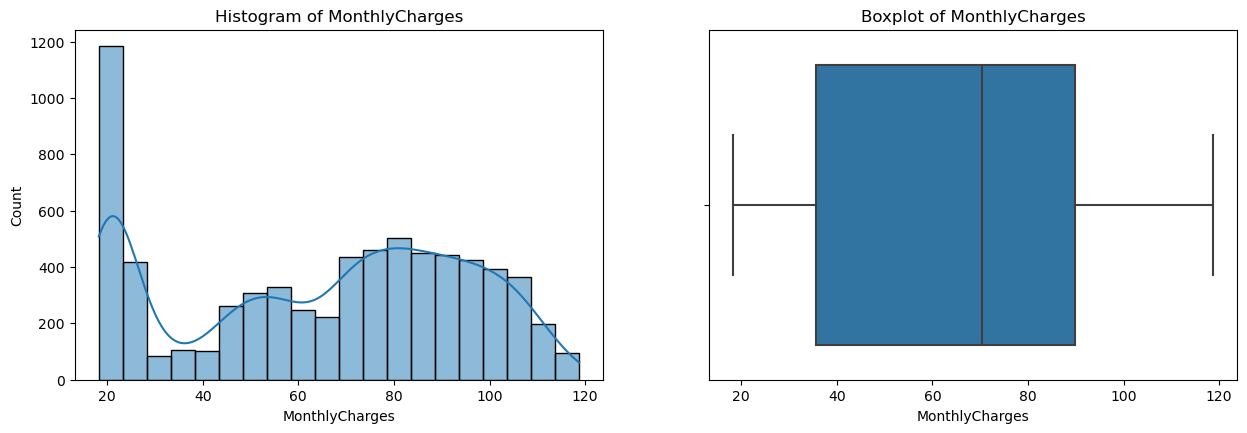

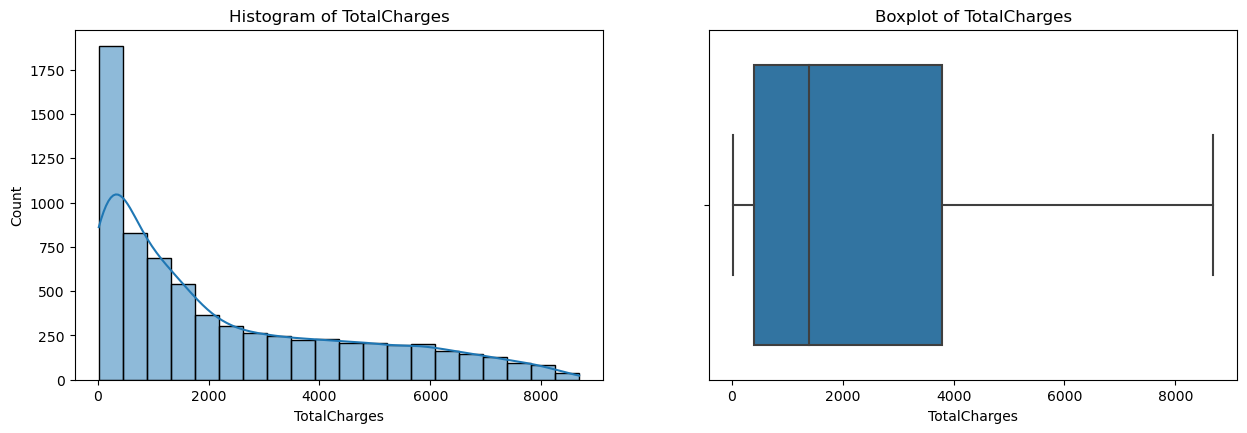

In [23]:
for i in df .select_dtypes(exclude='object'):
    uni_plot(i)

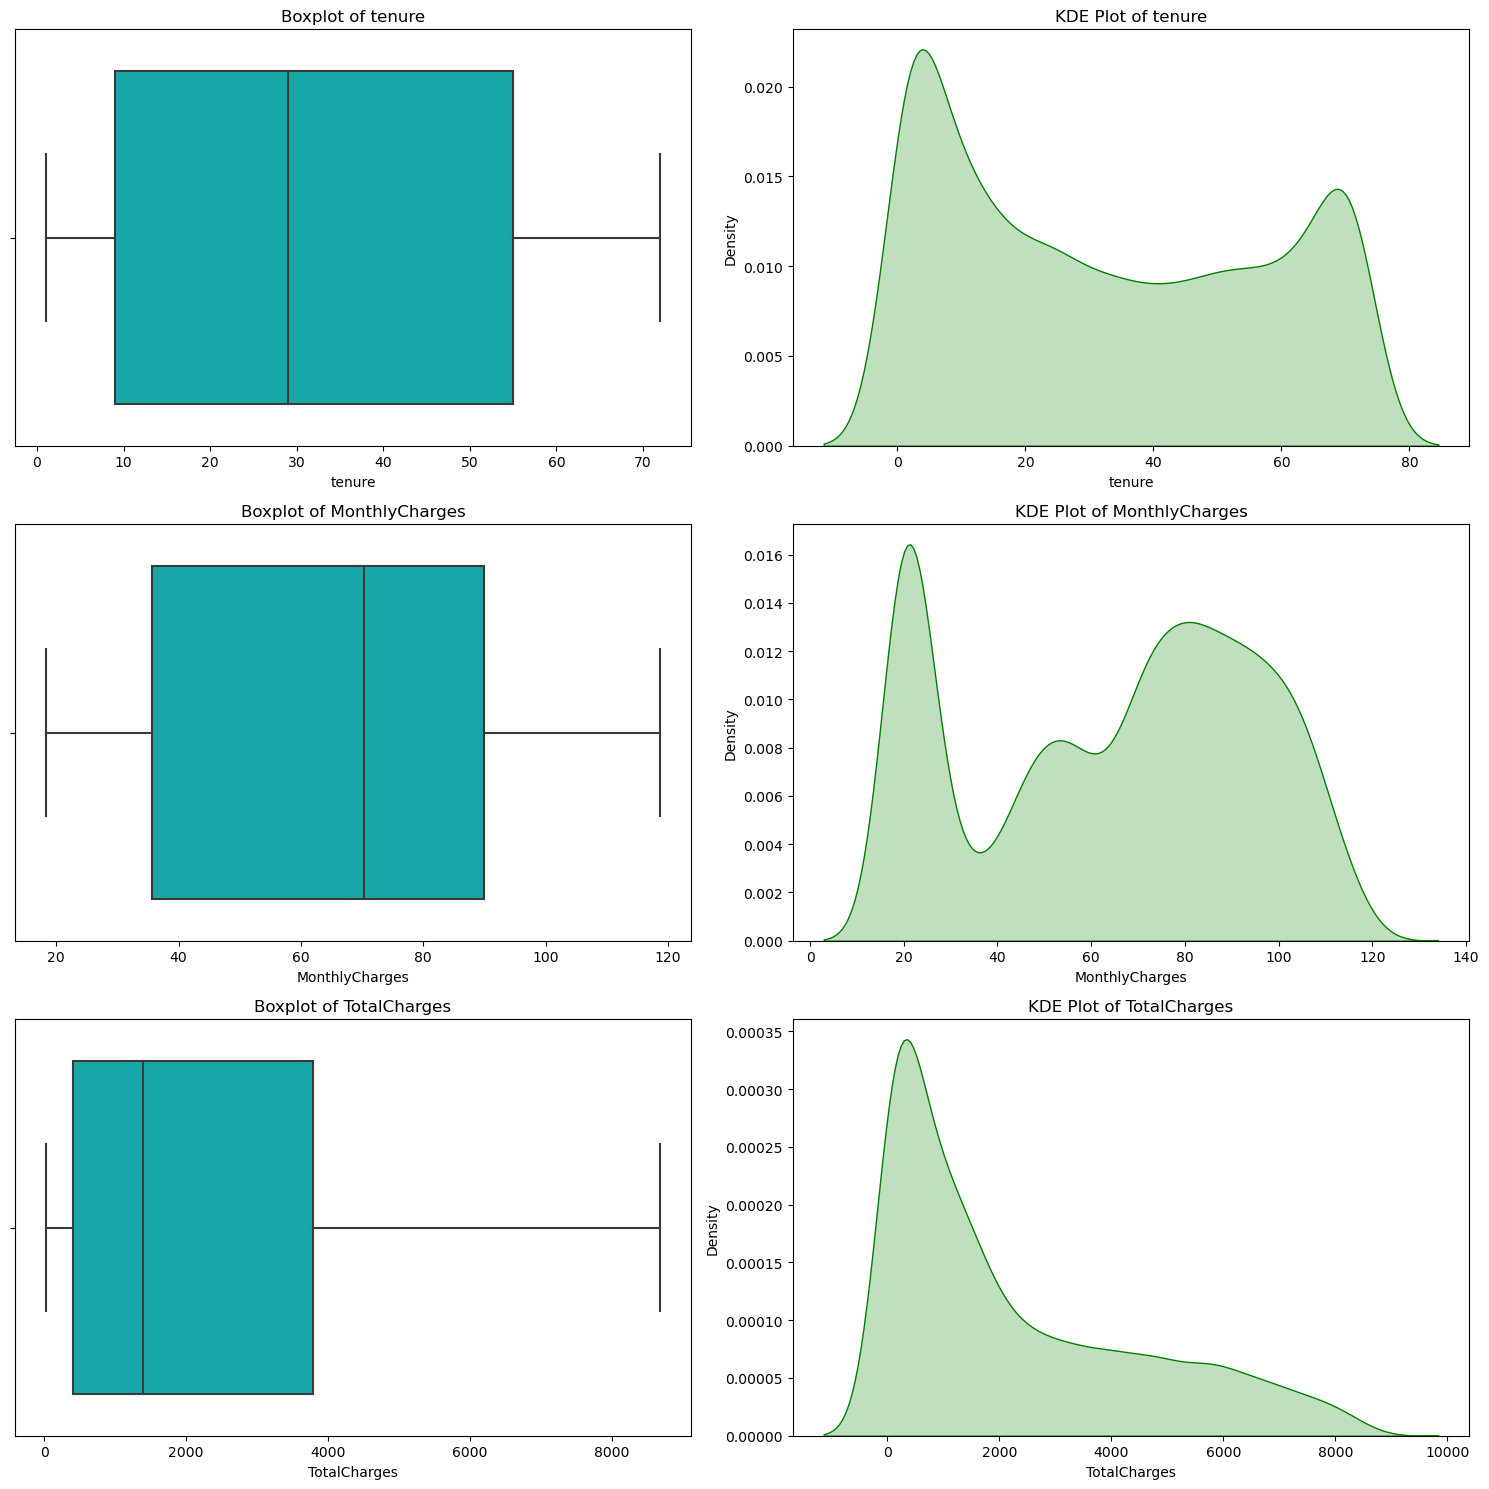

In [24]:
# Define numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

num_rows = len(numeric_cols)
num_cols = 2 

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)
for i, column in enumerate(numeric_cols):
    # Box plot
    sns.boxplot(x=df[column], ax=axes[i, 0], color='c')
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel(column)
    # KDE plot
    sns.kdeplot(data=df[column], ax=axes[i, 1], color='g', fill=True)
    axes[i, 1].set_title(f'KDE Plot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

In [25]:
# devide categorical columns in listist to ease plot them
customer_info = ["gender", "SeniorCitizen", "Partner", "Dependents"]
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
            "StreamingMovies"]
billing_info = ["Contract", "PaperlessBilling", "PaymentMethod"]

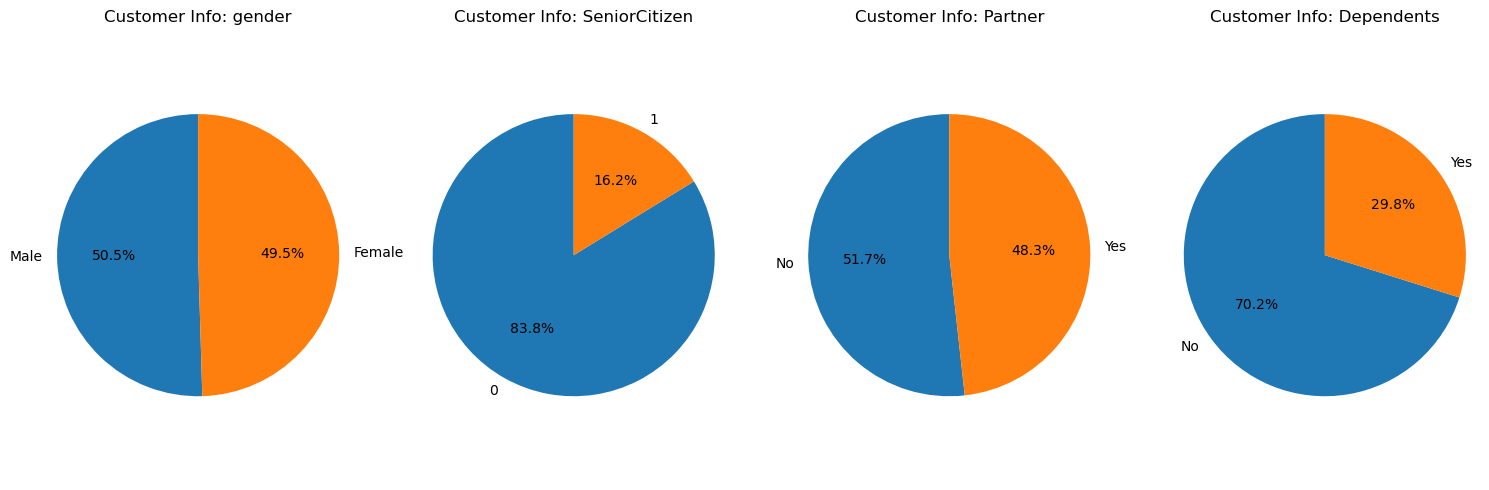

In [26]:
# Plot customer info columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(customer_info, 1):
    plt.subplot(1, 4, i)
    counts = df[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Customer Info: {col}')
    plt.axis('equal')  
plt.tight_layout()
plt.show()

In [27]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Label encoding

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['Partner'] = label_encoder.fit_transform(df['Partner'])
df['Dependents'] = label_encoder.fit_transform(df['Dependents'])
df['PhoneService'] = label_encoder.fit_transform(df['PhoneService'])
df['InternetService'] = label_encoder.fit_transform(df['InternetService'])
df['OnlineSecurity'] = label_encoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = label_encoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = label_encoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = label_encoder.fit_transform(df['StreamingTV'])
df['MultipleLines'] = label_encoder.fit_transform(df['MultipleLines'])
df['StreamingMovies'] = label_encoder.fit_transform(df['StreamingMovies'])
df['Contract'] = label_encoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = label_encoder.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])
df['Churn'] = label_encoder.fit_transform(df['Churn'])

In [29]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### Training the Data
We will now split our dataset before we train it. X will contain all the Independent variables while y will have the Dependent variable ('Churn')

In [30]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Churn'],axis=1)
y = df['Churn']

After successfully splitting the dataset, let us train it using train_test_split.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [32]:
x_train.shape

(4922, 19)

In [33]:
x_test.shape

(2110, 19)

In [34]:
y_train.shape

(4922,)

In [35]:
y_test.shape

(2110,)

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
# Feature selection using RFE
log_reg = LogisticRegression()
rfe = RFE(estimator=log_reg, n_features_to_select=15)  
rfe.fit(x_train, y_train)

selected_features = x_train.columns[rfe.support_]
print(f'Selected Features: {selected_features}')

# Select only the important features
x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)


Selected Features: Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract',
       'PaperlessBilling', 'MonthlyCharges'],
      dtype='object')


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(x_test_selected)
x_train_scaled = scaler.fit_transform(x_train_selected )

### Building the Models

As I stated earlier, we will use five models i.e. logistic regression , Random Forests, Decision Trees, Support Vector Machine and XGBoost to get the best accuracy score. ‘Accuracy’ metric is used to evaluate models. It is the ratio of the number of correctly predicted instances in a dataset divided by the total number of instances in the dataset. We will proceed further to explore more metrics to determine the best model.

#### Training the Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report

In [40]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [41]:
# Make predictions on the test set
y_pred_LR = logistic_model.predict(x_test_scaled)
y_pred_LR

array([0, 0, 1, ..., 0, 0, 0])

### Metrics

In [42]:
# Accuracy
lr_accuracy = accuracy_score(y_test, y_pred_LR)
lr_accuracy

0.7962085308056872

In [43]:
# Precision
lr_precision = precision_score(y_test, y_pred_LR,average="weighted")
print("Precision:", lr_precision)

Precision: 0.7855902597182207


In [44]:
# Recall
lr_recall = recall_score(y_test, y_pred_LR,average="weighted")
print("Recall:", lr_recall)

Recall: 0.7962085308056872


In [45]:
# F1 Score
lr_f1 = f1_score(y_test, y_pred_LR,average="weighted")
print("F1 Score:", lr_f1)

F1 Score: 0.78780516545929


In [46]:
lr_testing_score=logistic_model.score(x_test_scaled,y_test)
print("Testing score :",lr_testing_score)

Testing score : 0.7962085308056872


In [47]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.51      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



Text(0.5, 1.0, 'Confusion Matrix')

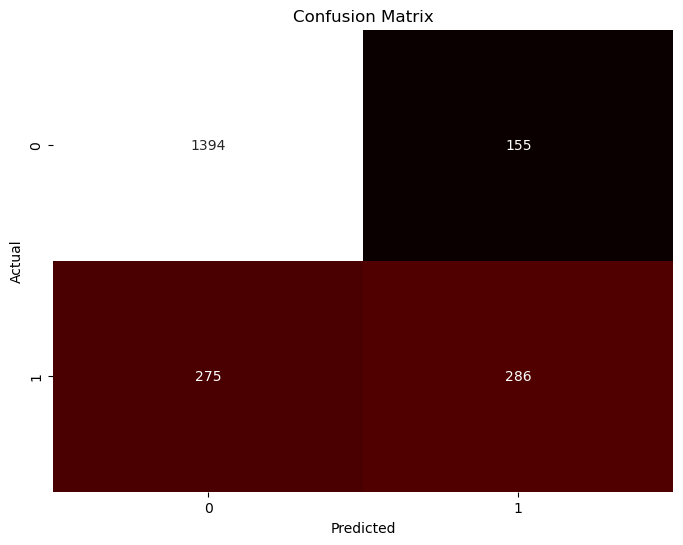

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred_LR),annot=True , fmt='d',cmap='hot',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

### Training the Decision tree Model

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
# Make predictions on the test set
pred_dt = dt_classifier.predict(x_test)
pred_dt

array([0, 0, 1, ..., 0, 1, 0])

### Metrics

In [51]:
# Accuracy
dt_accuracy = accuracy_score(y_test, pred_dt)
print("Accuracy:", dt_accuracy)

Accuracy: 0.7180094786729858


In [52]:
# Precision
dt_precision = precision_score(y_test, pred_dt,average="weighted")
print("Precision:", dt_precision)

Precision: 0.7227186024242065


In [53]:
# Recall
dt_recall = recall_score(y_test, pred_dt,average="weighted")
print("Recall:", dt_recall)

Recall: 0.7180094786729858


In [54]:
# F1 Score
dt_f1 = f1_score(y_test, pred_dt,average="weighted")
print("F1 Score:", dt_f1)

F1 Score: 0.7202296112191603


In [55]:
dt_testing_score = dt_classifier.score(x_test, y_test)
print("Testing Score:", dt_testing_score)

Testing Score: 0.7180094786729858


In [56]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1549
           1       0.47      0.50      0.48       561

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.64      2110
weighted avg       0.72      0.72      0.72      2110



Text(0.5, 1.0, 'Confusion Matrix')

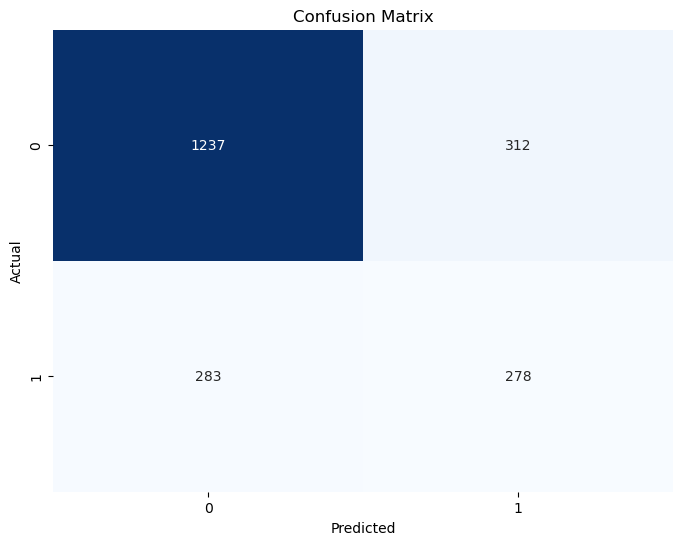

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,pred_dt),annot=True , fmt='d',cmap='Blues',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

### Training Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Make predictions on the test set
y_pred_RF = rf_classifier.predict(x_test_scaled)
y_pred_RF

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
rf_accuracy = accuracy_score(y_test, y_pred_RF)
rf_accuracy

0.7805687203791469

In [62]:
# Precision
rf_precision = precision_score(y_test, y_pred_RF,average="weighted")
print("Precision:", rf_precision)

Precision: 0.7683089508187416


In [63]:
# Recall
rf_recall = recall_score(y_test, y_pred_RF,average="weighted")
print("Recall:", rf_recall)

Recall: 0.7805687203791469


In [64]:
# F1 Score
rf_f1 = f1_score(y_test, y_pred_RF,average="weighted")
print("F1 Score:", rf_f1)

F1 Score: 0.7714305258675255


In [65]:
rf_testing_score = rf_classifier.score(x_test_scaled, y_test)
print("Testing Score:", rf_testing_score)

Testing Score: 0.7805687203791469


In [66]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.61      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



Text(0.5, 1.0, 'Confusion Matrix')

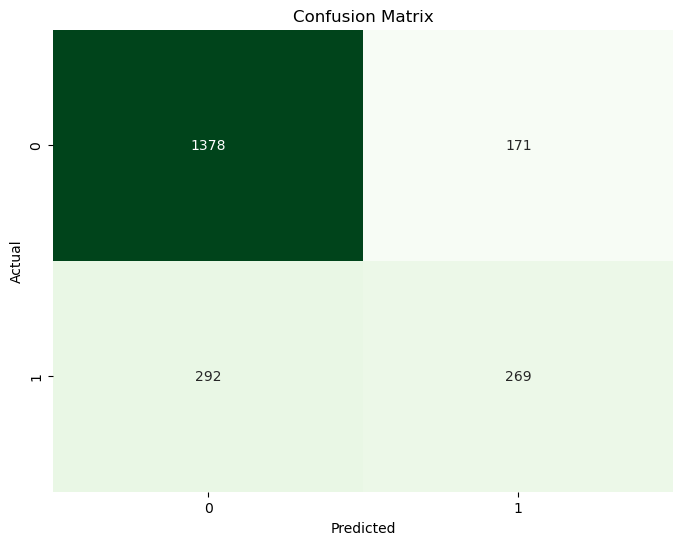

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred_RF),annot=True , fmt='d',cmap='Greens',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

### Training the KNN Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors = 23, metric = 'minkowski', p = 2)
kn_classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=23)

In [69]:
y_pred_knn = kn_classifier.predict(x_test_scaled)
y_pred_knn

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
# Accuracy
kn_accuracy=accuracy_score(y_test, y_pred_knn)
kn_accuracy

0.7748815165876777

In [71]:
# Precision
kn_precision = precision_score(y_test, y_pred_knn,average="weighted")
print("Precision:", kn_precision)

Precision: 0.7688071682464453


In [72]:
# Recall
kn_recall = recall_score(y_test, y_pred_knn,average="weighted")
print("Recall:", kn_recall)

Recall: 0.7748815165876777


In [73]:
# F1 Score
kn_f1 = f1_score(y_test, y_pred_knn,average="weighted")
print("F1 Score:", kn_f1)

F1 Score: 0.7713445191392754


In [74]:
kn_testing_score = kn_classifier.score(x_test_scaled, y_test)
print("Testing Score:", dt_testing_score)

Testing Score: 0.7180094786729858


In [75]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.58      0.53      0.56       561

    accuracy                           0.77      2110
   macro avg       0.71      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110



Text(0.5, 1.0, 'Confusion Matrix')

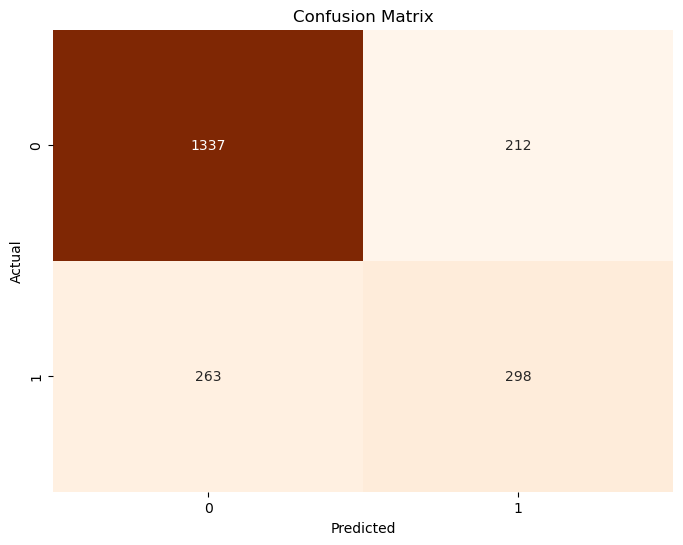

In [76]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True , fmt='d',cmap='Oranges',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

### Training Support Vector Machine (SVM) model

In [77]:
from sklearn.svm import SVC

In [78]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [79]:
# Make predictions on the test set
y_pred_SVM = svm_classifier.predict(x_test_scaled)
y_pred_SVM

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
# Evaluate the model's performance
svm_accuracy = accuracy_score(y_test, y_pred_SVM)
svm_accuracy

0.7928909952606635

In [81]:
# Precision
svm_precision = precision_score(y_test, y_pred_SVM,average="weighted")
print("Precision:", svm_precision)

Precision: 0.7832128455375931


In [82]:
# Recall
svm_recall = recall_score(y_test, y_pred_SVM,average="weighted")
print("Recall:", svm_recall)

Recall: 0.7928909952606635


In [83]:
# F1 Score
svm_f1 = f1_score(y_test, y_pred_SVM,average="weighted")
print("F1 Score:", svm_f1)

F1 Score: 0.7859165727558729


In [84]:
svm_testing_score = svm_classifier.score(x_test_scaled, y_test)
print("Training Score:", svm_testing_score)

Training Score: 0.7928909952606635


In [85]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.63      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



Text(0.5, 1.0, 'Confusion Matrix')

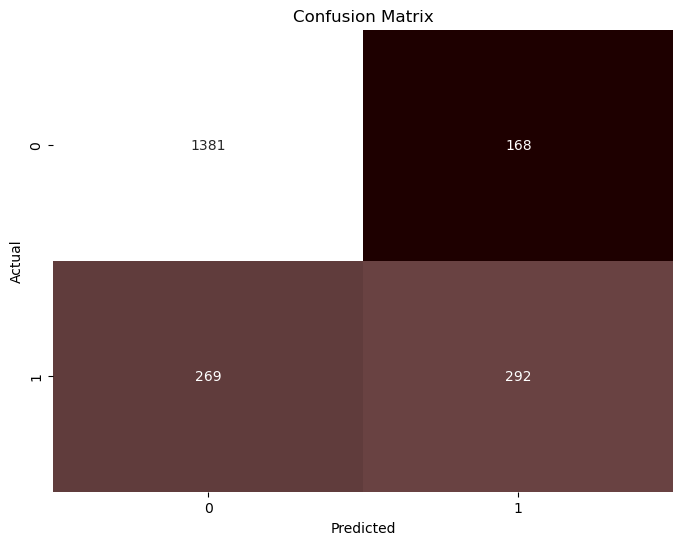

In [86]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_SVM),annot=True , fmt='d',cmap='pink',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

### Training the SGD Classifier

In [87]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier()
sgd_classifier.fit(x_train_scaled, y_train)

SGDClassifier()

In [88]:
# Make predictions on the test set
pred_sgd = sgd_classifier.predict(x_test_scaled)
pred_sgd

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
# Accuracy
sgd_accuracy=accuracy_score(y_test, pred_sgd)
sgd_accuracy

0.7853080568720379

In [90]:
# Precision
sgd_precision = precision_score(y_test, pred_sgd,average="weighted")
print("Precision:", sgd_precision)

Precision: 0.7770806206554095


In [91]:
# Recall
sgd_recall = recall_score(y_test, pred_sgd,average="weighted")
print("Recall:", sgd_recall)

Recall: 0.7853080568720379


In [92]:
# F1 Score
sgd_f1 = f1_score(y_test, pred_sgd,average="weighted")
print("F1 Score:", sgd_f1)

F1 Score: 0.7800017048255599


In [93]:
sgd_testing_score = sgd_classifier.score(x_train_scaled, y_train)
print("Testing Score:", sgd_testing_score)

Testing Score: 0.7872815928484356


In [94]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1549
           1       0.61      0.53      0.57       561

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



Text(0.5, 1.0, 'Confusion Matrix')

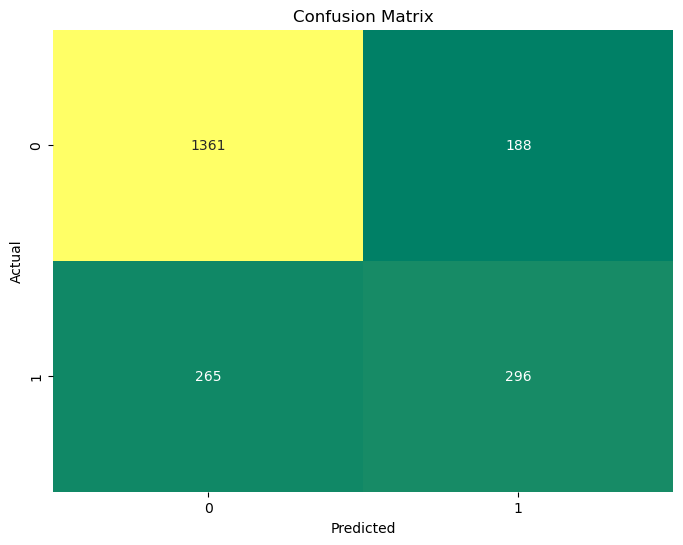

In [95]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,  pred_sgd),annot=True , fmt='d',cmap='summer',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

### FINAL CONCLUSIONS

In [99]:
Index=['Accuracy_Score','Precision_Score','Recall_Score','F1_Score','Test_Score']

In [100]:
conclusion = pd.DataFrame({'DT_Model':[dt_accuracy,dt_precision,dt_recall,dt_f1,dt_testing_score],
           'SGD_Model':[sgd_accuracy,sgd_precision,sgd_recall,sgd_f1,sgd_testing_score],
            'KNN_Model':[kn_accuracy,kn_precision,kn_recall,kn_f1,kn_testing_score],
            'Random Forest_Model':[rf_accuracy,rf_precision,rf_recall,rf_f1,rf_testing_score],
            'SVM_Model':[svm_accuracy,svm_precision,svm_recall,svm_f1,svm_testing_score],
            'Logistic Regression_Model':[lr_accuracy,lr_precision,lr_recall,lr_f1,lr_testing_score],
            },index=Index)

In [101]:
summary_of_models=(round(conclusion,2))
summary_of_models

,DT_Model,SGD_Model,KNN_Model,Random Forest_Model,SVM_Model,Logistic Regression_Model
Accuracy_Score,0.72,0.79,0.77,0.78,0.79,0.80
Precision_Score,0.72,0.78,0.77,0.77,0.78,0.79
Recall_Score,0.72,0.79,0.77,0.78,0.79,0.80
F1_Score,0.72,0.78,0.77,0.77,0.79,0.79
Test_Score,0.72,0.79,0.77,0.78,0.79,0.80


In conclusion, the Logistic Regression Model has the highest scores across all the evaluation metrics. Therefore, the **Logistic Regression Model** is the best model for **telco customer churn classification** based on the provided performance metrics.